# Understanding Good White Wines

## Dataset Information

### Citation

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236. 

Available at: <br> <br>
[@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016 <br>
[Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf <br>
[bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib <br>
     
### Summary

In the above reference, two datasets were created, using red and white wine samples.
The inputs include objective tests (e.g. PH values) and the output is based on sensory data
(median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
between 0 (very bad) and 10 (very excellent).

### Features
   - **fixed acidity (nonvolatile acids)**: acids that do not evaporate when wine is heated.   
   - **volatile acidity**: acids that evaporate when wine heated, when in high amounts can give an unpleasant taste.
   - **citric acid**: type of fixed acid, added to wines to increase acidity or give a 'fresh' flavor. 
   - **residual sugar**: any natural grape sugars that are leftover after fermentation is done.
   - **chlorides**: contribute to the saltiness of the wine.
   - **free sulfur dioxide**: component of 'total sulfur dioxide', used to protect against microbes and oxidation.
   - **total sulfur dioxide**: free sulfur dioxide + bound sulfur dioxide  
   - **density**: used as a measure of the conversion of sugar to alcohol (ie. finished wine has less sugar but lots of alcohol and thus has a lower density)
   - **pH**: describes how acidic (0-6) or basic (8-14) the wine is. 
   - **sulphates**: a wine additive which can contribute to sulfur dioxide levels, which acts as an antimicrobial and antioxidant
   - **alcohol**: percentage of alcohol present in the wine.

### Target variable
   - **quality**: score given to the wine between 0 (lowest) and 10 (highest).
   
### Goal 
The goal is to understand and identify what qualities make a good white wine, and pinpoint how exactly each characterisitc positvely or negatively can affect the the quality of white wine. This dataset can either be approached by using classification or regression. Today, I will attempt to understand the relationships utilizing linear regression. By understanding these relationship, I can make better decisions when purchasing wine.

## Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline

In [ ]:
white_wine = pd.read_csv('../wine-quality/winequality-white.csv', sep = ';')
white_wine.columns = [c.lower().replace(' ', '_') for c in white_wine.columns]

white_wine.head()

In [ ]:
# colors I will be using in this notebook
Spectral = sns.color_palette("Spectral_r", n_colors=len(white_wine.columns))
dark_yellow = Spectral[8]
light_yellow = Spectral[5]

# ignore warnings
warnings.filterwarnings(action = 'ignore')

In [ ]:
# Check for null values
print('White Wine: ')
print(white_wine.isnull().any())

In [ ]:
# start EDA - get shape
print("White Wine Df Dimensions:", white_wine.shape)

In [6]:
# get datatypes
print("White Wine datatypes: \n")
print(white_wine.dtypes)

In [7]:
# get statistics for white wine target variable
print("White wine 'quality' statistics:")
white_wine['quality'].describe()

White wine 'quality' statistics:


count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [8]:
# styling for seaborn
sns.set(style="darkgrid")
sns.set(font_scale = 1.2)

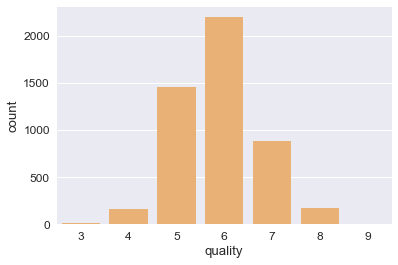

In [9]:
sns.countplot(white_wine['quality'], color =dark_yellow)

The distribution of white wine frequencies looks roughly normal. The most common wines in the dataset are either 5 or 6. 

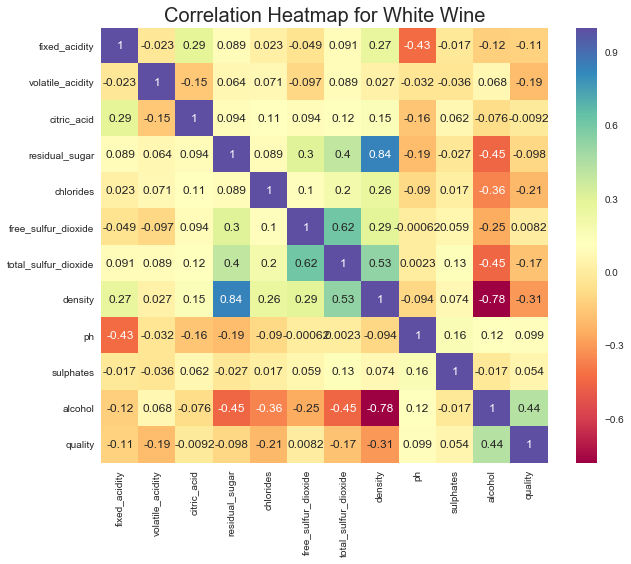

In [10]:
# see correlations of white wine features
sns.set(font_scale = 1)
white_wine_corr = white_wine.corr()
white_wine_corr = (white_wine_corr)
plt.figure(figsize=(10,8))
sns.heatmap(white_wine_corr, 
            xticklabels = white_wine_corr.columns.values,
            yticklabels = white_wine_corr.columns.values,
            annot=True,
            cmap = 'Spectral')
plt.title('Correlation Heatmap for White Wine', fontsize = 20)
# white_wine_corr
sns.set(font_scale = 1.2)

In [11]:
# display quality correlations in descending order
# exclude last index because quality correlates 100% with itself
print('White Wine Quality Correlations: \n')
print(white_wine_corr['quality'][:-1].sort_values(ascending = False))

White Wine Quality Correlations: 

alcohol                 0.435575
ph                      0.099427
sulphates               0.053678
free_sulfur_dioxide     0.008158
citric_acid            -0.009209
residual_sugar         -0.097577
fixed_acidity          -0.113663
total_sulfur_dioxide   -0.174737
volatile_acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64


We see that alcohol, ph, sulphates, and free_sulfur dioxide positively correlate with our target, quality. Let's explore this features in how they react with the target as well as each other!

In [12]:
from scipy.stats import skew
from scipy.stats import kurtosis

In [13]:
# creating log transformation dataframe (except for 'quality')
white_wine_log = pd.DataFrame()
for feature in white_wine.columns:
    if (feature != 'quality'):
        white_wine_log[feature] = np.log(white_wine[feature] + 1)
#         white_wine_log['log_{}'.format(feature)] = np.log(white_wine[feature] + 1)
        
white_wine_log['quality'] = white_wine.quality

When performing linear regressions it is important that our features be normally distributed for optimal results. I have created a function that checks on a certain feature to see its 'visual' distribution characterisitcs, skewness and kurtosis. Also, I have created a function that allows me to plot two features against each other in order to visualize their relationship.

In [14]:
def check_dist(feature, log_feature, log = True):
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(18, 6))
    axes = axes.flatten()
 
    sns.distplot(feature, color = dark_yellow, ax = axes[0]).set_title('{}'.format(feature.name))
    print('--{}--'.format(feature.name))
    print('Skew: {}'.format(skew(feature)))
    print('Kurtosis: {}'.format(kurtosis(feature)))
    
    if (log == True):
        sns.distplot(log_feature, color = dark_yellow, ax = axes[1]).set_title('log({} + 1)'.format(feature.name))
        print()
        print('--log({} + 1)--'.format(feature.name))
        print('Skew: {}'.format(skew(log_feature)))
        print('Kurtosis: {}'.format(kurtosis(log_feature)))


In [15]:
def plot_features(feature1, feature2, df, axis):
    qualities = np.sort(white_wine_log.quality.unique())
    colors = sns.color_palette("Spectral_r", n_colors=len(white_wine_log.quality.unique()))
    for quality,color in zip(np.nditer(qualities), colors):
        axis.scatter(x=df[df['quality'] == quality][feature1],
                     y=df[df['quality'] == quality][feature2],
                     color=color, 
                     label=quality,
                     s = 100,
                     edgecolors='none')

    axis.legend(loc = 'upper right')
    sns.regplot(x = df[feature1], y = df[feature2],  ax = axis, scatter = False).set_title('{} vs. {}'.format(str(feature1), str(feature2)))

--alcohol--
Skew: 0.48719273327634327
Kurtosis: -0.6989373013774789

--log(alcohol + 1)--
Skew: 0.32493256804327914
Kurtosis: -0.883833310686911


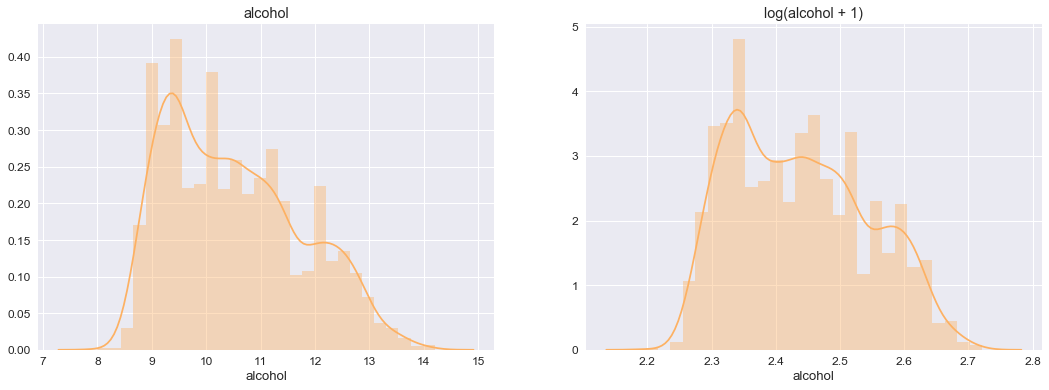

In [16]:
check_dist(white_wine.alcohol, white_wine_log.alcohol)

The transformation helped a bit, but the feature already moderately normally distributed.

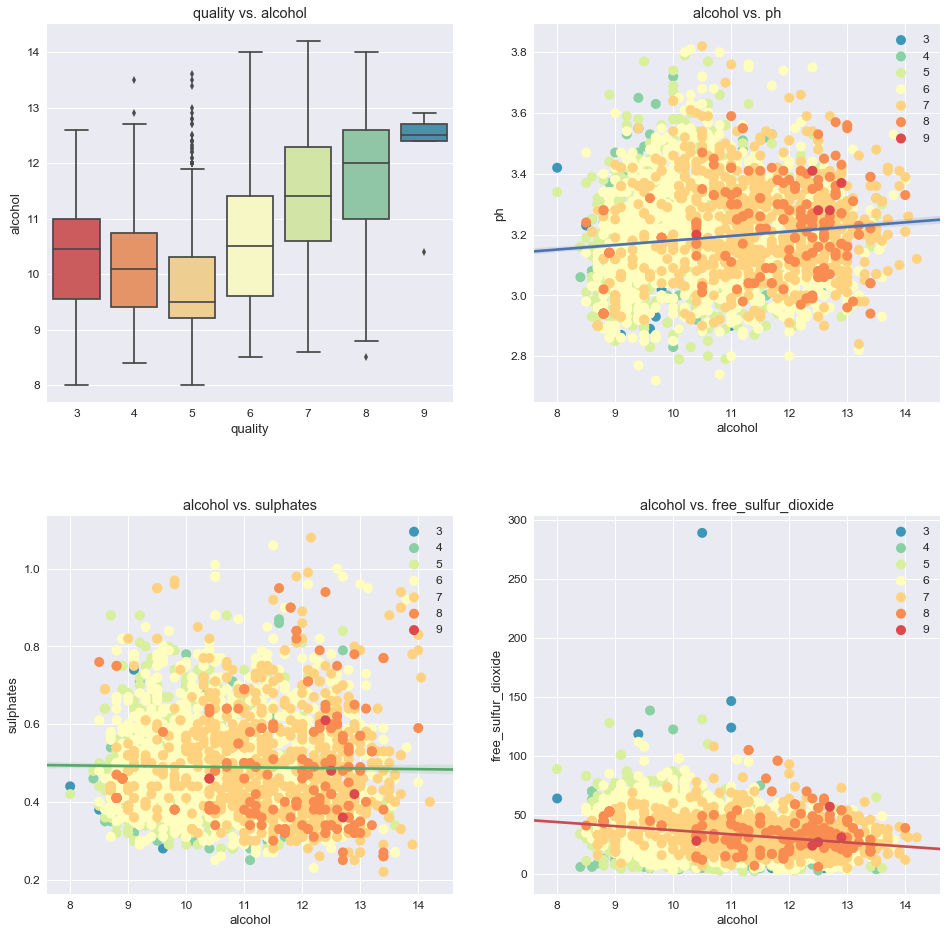

In [17]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(16, 16))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.3)

sns.boxplot(x = white_wine.quality, y = white_wine.alcohol, palette = 'Spectral', ax = axes[0]).set_title('quality vs. alcohol')
plot_features('alcohol', 'ph', white_wine, axes[1]) 
plot_features('alcohol', 'sulphates', white_wine, axes[2]) 
plot_features('alcohol', 'free_sulfur_dioxide', white_wine, axes[3]) 


We see that alcohol has a pretty strong relationship with quality, which may make it a good indicator. Second, in the graph 'alcohol vs. ph', wines with more alcohol content are better quality, however, the ph levels seem to vary with the range from 1.37-1.5.  In the graph 'alcohol vs. sulphates, we see that better quality wines tend to have a lower sulphate content (0.25-0.4) and higher alcohol content. But also there is more variation in our y variable, sulphates, in this graph. Lastly, we have 'alcohol vs. free_sulfur_dioxide', and these two features seem to very positively correlate with each other- good quality wines tend to have higher alcohol content and free_sulfur_dioxide. 

--ph--
Skew: 0.457642339253789
Kurtosis: 0.5290085383907281

--log(ph + 1)--
Skew: 0.3358152556414338
Kurtosis: 0.34814429305191696


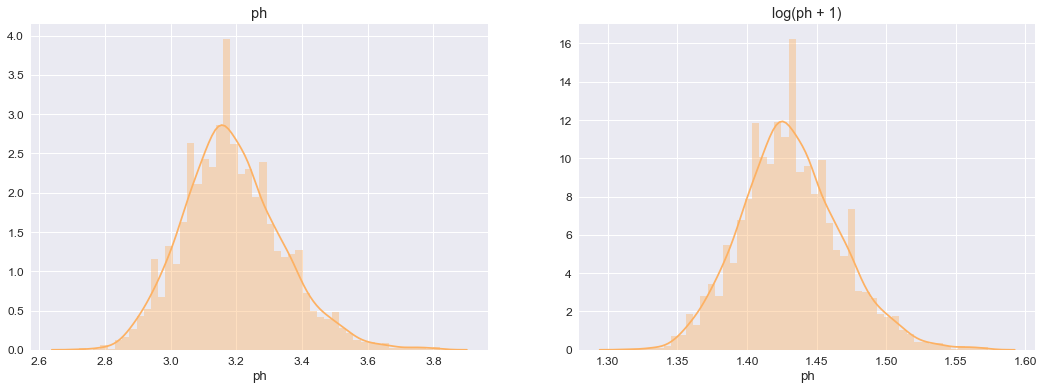

In [18]:
check_dist(white_wine.ph, white_wine_log.ph)

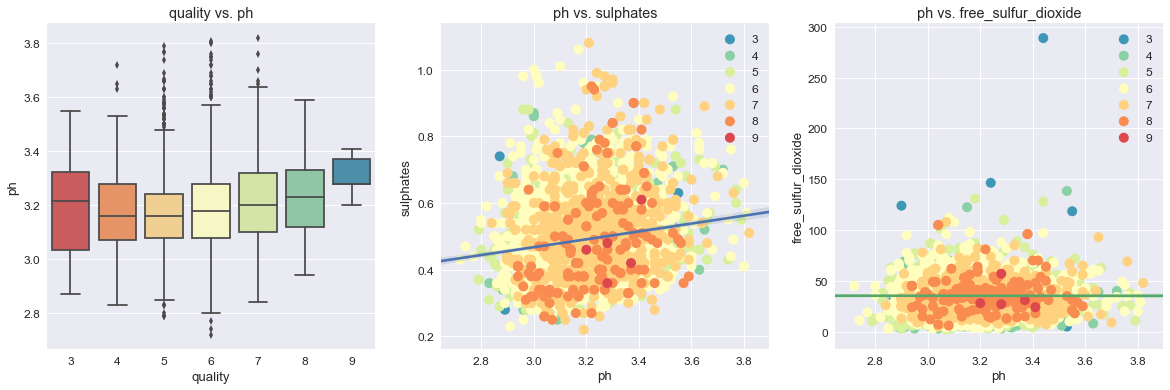

In [19]:
# white wine pH
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(20, 6))
axes = axes.flatten()

sns.boxplot(x = white_wine.quality, y = white_wine.ph, palette = 'Spectral', ax = axes[0]).set_title("quality vs. ph")
plot_features('ph', 'sulphates', white_wine, axes[1]) 
plot_features('ph', 'free_sulfur_dioxide', white_wine, axes[2]) 

We see that ph has a slight positive relationship with quality, but not by much. There is most likely a range of ph that wine makers aim for in order to make their wine enjoyable and not too acidic. Next, in the graph 'ph vs. sulphates', the better wines tend to have lower sulphates. Finally, in 'ph vs. free_sulfur_dioxide', we see that most of the good wines are more concentrated in the upper region of the graph, with higher amounts of free_sulfur_dioxide.

--sulphates--
Skew: 0.9768943947733427
Kurtosis: 1.5880812942840752

--log(sulphates + 1)--
Skew: 0.7058097381526302
Kurtosis: 0.80465827933814


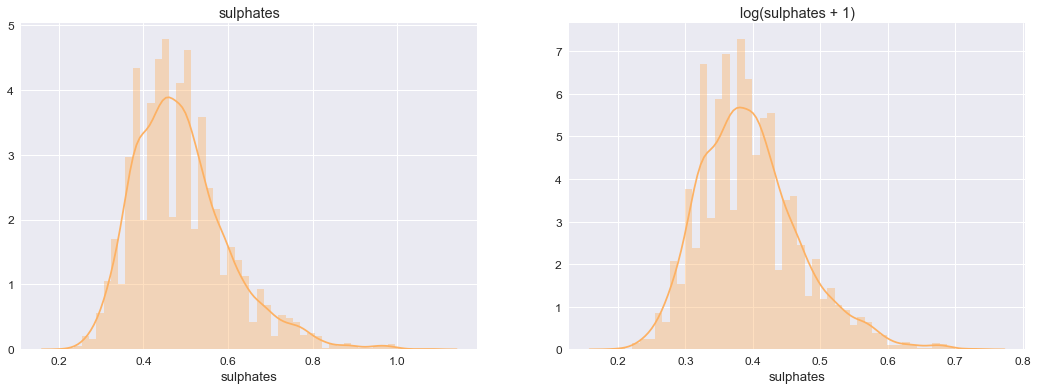

In [20]:
check_dist(white_wine.sulphates, white_wine_log.sulphates)

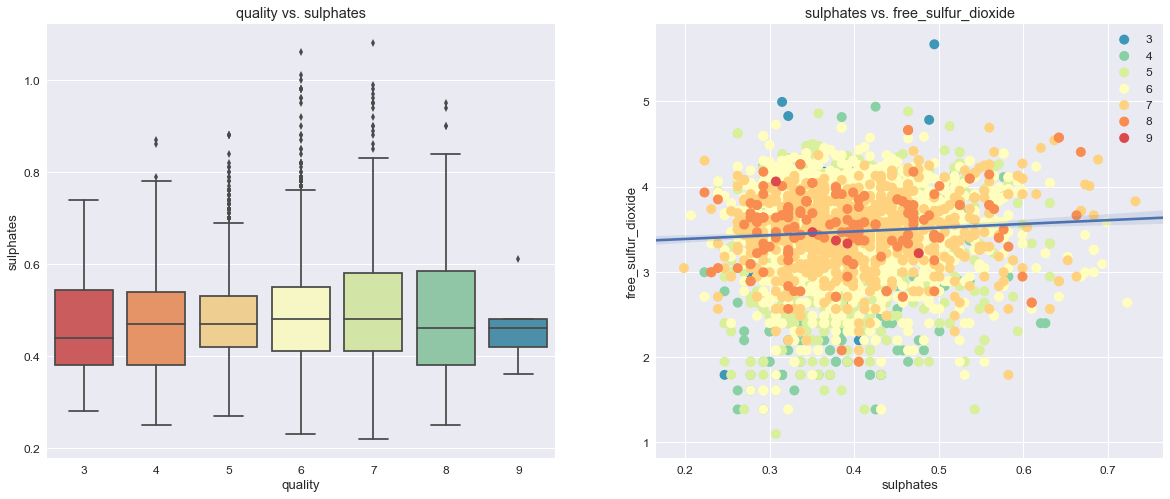

In [21]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(20, 8))
axes = axes.flatten()

sns.boxplot(x = white_wine.quality, y = white_wine.sulphates, palette = 'Spectral', ax = axes[0]).set_title("quality vs. sulphates")
plot_features('sulphates', 'free_sulfur_dioxide', white_wine_log, axes[1]) 

We do not see much of a relationship here with quality and sulphates. It might seem there is a slight negative relationship because quality = 9 is slightly lower than the others, however, we need to realize that we do not have many samples for that category, so it may be misleading. Here in the second graph, 'sulphates vs. sulfur_dioxide, we see that wine quailities 7, 8, and 9 seem be in roughly the same region.   

--free_sulfur_dioxide--
Skew: -0.828047338719055
Kurtosis: 1.1153147599280793

--log(free_sulfur_dioxide + 1)--
Skew: -0.828047338719055
Kurtosis: 1.1153147599280793


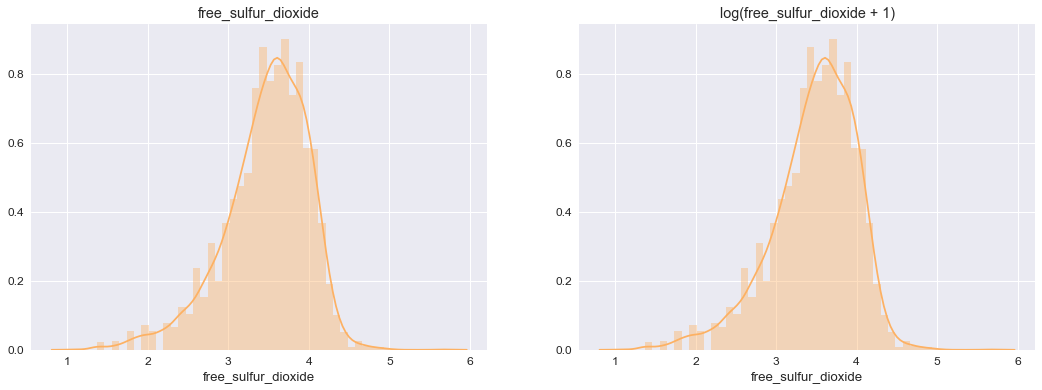

In [22]:
check_dist(white_wine_log.free_sulfur_dioxide, white_wine_log.free_sulfur_dioxide)

Text(0.5, 1.0, 'quality vs. free_sulfur_dioxide')

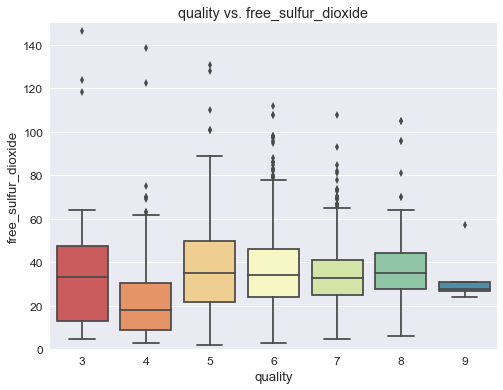

In [23]:
# white wine free_sulfur_dioxide
fig, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x = white_wine.quality, y = white_wine.free_sulfur_dioxide, palette = 'Spectral')
fig.axis(ymin=0, ymax=150);
fig.set_title('quality vs. free_sulfur_dioxide')

It does not look like there is much of a relationship here. The median free_sulfur_dioxide of quality = 4 is slightly lower, but this might be noise, as the medians for the rest of the qualities seem to be roughly equal. 

### Models

Now that we're finished exploring the features of white_wine, we need to pick a model to fulfill our goals. For this exercise, I will be using a regression model. To prepare, I will convert my dependent variable, quality, into a binary variable, where 1 represents 'good'  (quality $>=$ 7) white wine and 0 represents 'bad' (quality $<$ 7) white wine. Since we have a binary independent varaible, quality (our 'y'), and continuous independent variables (our 'x's'), I have the choice of picking the following models:

1. **Linear Probability Model (LPM)**
2. **Logistic Regression (Logit)**
3. **Probit Model (Probit)**

Each model has its pros and cons, which we will discuss.

In [24]:
# creating bins for 'good' and 'bad' quality wine
# White Wine: 2 bins 'bad'(quality < 6) and 'good'(6 < quality < 9)
bins_white = (2, 6, 9)

# 0 represents bad quality wines, while 1 represents good quality wines
groups = [0, 1]
white_wine.quality = pd.cut(white_wine.quality, bins = bins_white, labels = groups)

Text(0.5, 1.0, 'White Wine Quality Distribution (w/ Bins)')

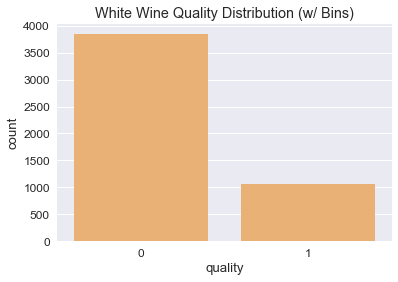

In [25]:
sns.countplot(x=white_wine.quality, color = dark_yellow).set_title('White Wine Quality Distribution (w/ Bins)')

## Linear Probability Model (LPM)

LPM uses Ordinary Least Squares (OLS) as a method to fit the regression. It essentially is using a linear regression with a 0-1 dependent variable.

### Assumptions

In order for our results to be interpretable, it is very important that all of our variables do not violate any of the following. These are the OLS assumptions for multivariate regression.

1. **Linear Relationship**: there should be a linear relationship between the independent variable (y) and its dependent variables (X).
<br>
<br>
2. **No Autocorrelation**: there should be no correlation between the error terms.
<br>
<br>
3. **No Perfect Multicollinearity**: there should be no correlation between the independent variables.
<br>
<br>
4. **No Large Outliers**: there should be no large outliers.
<br>
<br>

**Pros**
- computational easy to estimate
- interpretation is straightforward

**Cons**
- predicted probabilites are unbounded
- errors/residuals are heteroskedastic (non-constant variance)

In [26]:
import statsmodels.api as sm

X = sm.add_constant(white_wine.drop(['quality'],axis=1))

y = white_wine.quality

# apply OLS
lm = sm.OLS(y, X).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     97.86
Date:                Tue, 06 Nov 2018   Prob (F-statistic):          8.48e-202
Time:                        08:56:37   Log-Likelihood:                -2116.7
No. Observations:                4898   AIC:                             4257.
Df Residuals:                    4886   BIC:                             4335.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   62.8266      9.341      6.726      0.000      44.514      81.139
fixed_acidity            0.0461      0.010      4.448      0.000       0.026       0.066
volatile_acidity        -0.3082      0.057     -5.452      0.000      -0.419      -0.197
citric_acid             -0.0351      0.048     -0.738      0.461      -0.128       0.058
residual_sugar           0.0311      0.004      8.306      0.000       0.024       0.038
chlorides               -0.2664      0.271     -0.981      0.326      -0.799       0.266
free_sulfur_dioxide      0.0014      0.000      3.433      0.001       0.001       0.002
total_sulfur_dioxide    -0.0002      0.000     -1.290      0.197      -0.001       0.000
density                -65.2945      9.475     -6.891      0.000     -83.870     -46.719
ph                       0.3370      0.052      6.438      0.000       0.234       0.440
sulphates                0.2764      0.050      5.543      0.000       0.179       0.374
alcohol                  0.0630      0.012      5.235      0.000       0.039       0.087
==============================================================================
Omnibus:                      596.121   Durbin-Watson:                   1.582
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.305
Skew:                           1.016   Prob(JB):                    7.56e-184
Kurtosis:                       3.017   Cond. No.                     3.74e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Checking Linear Relationship and No Large Outliers

We want to make sure there is a linear relationship between our independent and dependent variables. We will confirm this by plotting 'fitted' values (values our model predicted) against the residuals (errors).

Text(0, 0.5, 'Residuals')

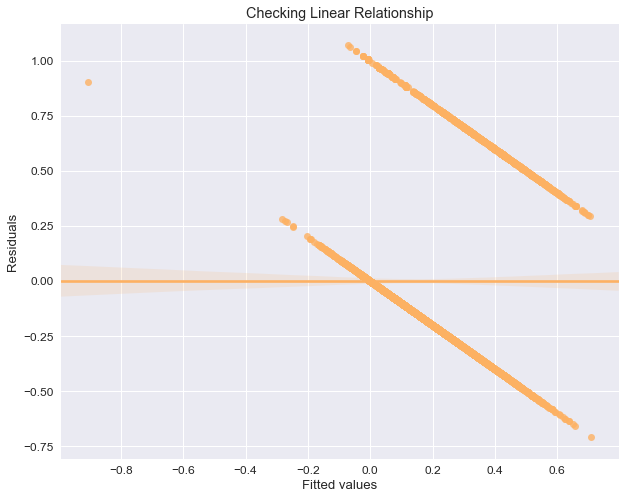

In [27]:
fitted_y = lm.fittedvalues
residuals = lm.resid
plt.figure(figsize=(10,8))
sns.regplot(x=fitted_y, y=residuals, color = dark_yellow).set_title('Checking Linear Relationship')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

We see that there is a large outlier on the on the graph. Let's remove that.

In [28]:
outlier_index = fitted_y[fitted_y <= -0.6 ].index[0]
white_wine = white_wine.drop(white_wine.index[outlier_index])
white_wine_log = white_wine_log.drop(white_wine_log.index[outlier_index])

Now let's refit the model.

In [29]:
X = sm.add_constant(white_wine.drop(['quality'],axis=1))
y = white_wine.quality
# apply OLS
lm = sm.OLS(y, X).fit()

Text(0, 0.5, 'Residuals')

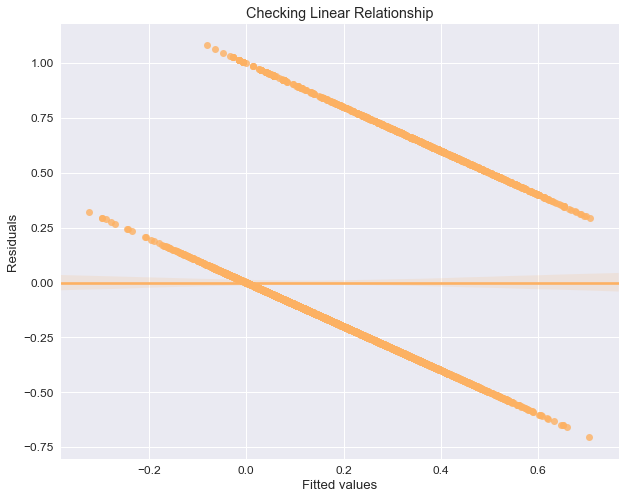

In [30]:
fitted_y = lm.fittedvalues
residuals = lm.resid
plt.figure(figsize=(10,8))
sns.regplot(x=fitted_y, y=residuals, color = dark_yellow).set_title('Checking Linear Relationship')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

This looks like a somewhat well-behaved residuals vs. fitted values plot. Anything on the line represents a correctly predicted quality (error = 0). The 'lines' in our graph comes from the fact that our independent variable is binary. We can see one of the cons mentioned above for LPM, which is that there are predictions that are out bounds, greater than 1 or less than 0. 

### Checking No Autocorrelation
This is important to check because if there is correlation between our error terms, the standard estimated errors tend to underestimate true standard errors, which would affect the confidence interval by making it narrower or wider.

In order to check this we will be using the Durbin-Watson (DW) statistic. This value lies between 0 through 4.  
- if DW = 2 -> no autocorrelation
- if 0 < DW < 2 -> positive autocorrelation
- if 2 < DW < 4 -> negative autocorrelation

In [31]:
from statsmodels.stats.stattools import durbin_watson

residuals = lm.resid
results = durbin_watson(residuals)
print('DW: {}'.format(results))

DW: 1.5775510833255166


We see that since our DW statistic is between 0 and 2, there is slight positve autocorrelation between the error terms. 

### Checking Multicollinearity
There should be no correlation between independent variables. This is very important because the goal of regression is to figure out the relationships between our independent variables and our depdendent variable; if independent variables are correlated, it is difficult to pinpoint the exact effect each has on the dependent variable. 

We will be checking this by using the Variance Inflation Factor (VIF).

- VIF $=$ 1 (Not correlated)
- 1 $<$ VIF $<$ 5 (Moderately correlated)
- VIF $>=$ 5 (Highly correlated)

In [32]:
# checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = white_wine.drop(['quality'],axis=1).assign(const=1)
pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])],index=X_vif.columns).round(3)

fixed_acidity                 3.250
volatile_acidity              1.131
citric_acid                   1.164
residual_sugar               16.100
chlorides                     1.242
free_sulfur_dioxide           1.795
total_sulfur_dioxide          2.306
density                      39.464
ph                            2.488
sulphates                     1.162
alcohol                      10.958
const                   4504196.544
dtype: float64

We see that there is a very high correlations between residual_sugar, density, and alcohol. All other features are very moderately correlated. Let's try and remove some features to see if we can lower the correlation. 

First, I realize that density is a linear combination of residual_sugar and alcohol. The more alcohol a wine has, the lower its sugar content, and thus lower density. Since density encapsulates both alcohol and residual sugar, I will will keep density as a independent variable, while removing residual_sugar and alcohol.

Also, I notice that total_sulfur_dioxide is a linear combination of free_sulfur_dioxide and bound sulfur dioxide (not a feature); thus I will create a feature, bound sulfur dioxide by subtracting free_sulfur_dioxide from total_sulfur_dioxide. 

In [33]:
white_wine['bound_sulfur_dioxide'] = white_wine.total_sulfur_dioxide - white_wine.free_sulfur_dioxide
white_wine = white_wine.drop(['total_sulfur_dioxide', 'residual_sugar', 'alcohol'],axis=1)

In [34]:
X_vif = white_wine.drop(['quality'],axis=1).assign(const=1)
pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])],index=X_vif.columns).round(3)

fixed_acidity                1.426
volatile_acidity             1.090
citric_acid                  1.153
chlorides                    1.106
free_sulfur_dioxide          1.176
density                      1.579
ph                           1.283
sulphates                    1.053
bound_sulfur_dioxide         1.471
const                   179710.448
dtype: float64

A lot less correlation!

Since we removed features, we will need to build a new model.

In [35]:
X = sm.add_constant(white_wine.drop(['quality'],axis=1))
y = white_wine.quality
# apply OLS
lm = sm.OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     68.91
Date:                Tue, 06 Nov 2018   Prob (F-statistic):          4.85e-120
Time:                        08:56:52   Log-Likelihood:                -2311.7
No. Observations:                4897   AIC:                             4643.
Df Residuals:                    4887   BIC:                             4708.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   36.1089      2.353     15.349      0.000      31.497      40.721
fixed_acidity            0.0135      0.008      1.715      0.086      -0.002       0.029
volatile_acidity        -0.1436      0.058     -2.486      0.013      -0.257      -0.030
citric_acid              0.0231      0.049      0.469      0.639      -0.073       0.120
chlorides               -1.9995      0.267     -7.484      0.000      -2.523      -1.476
free_sulfur_dioxide      0.0019      0.000      5.253      0.000       0.001       0.003
density                -36.7049      2.387    -15.376      0.000     -41.385     -32.025
ph                       0.1648      0.042      3.959      0.000       0.083       0.246
sulphates                0.2192      0.050      4.391      0.000       0.121       0.317
bound_sulfur_dioxide    -0.0007      0.000     -3.716      0.000      -0.001      -0.000
==============================================================================
Omnibus:                      728.945   Durbin-Watson:                   1.586
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1111.295
Skew:                           1.167   Prob(JB):                    4.85e-242
Kurtosis:                       2.957   Cond. No.                     6.92e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
white_wine_log['bound_sulfur_dioxide'] = np.log(white_wine['bound_sulfur_dioxide'] +  1)
white_wine_log = white_wine_log.drop(['total_sulfur_dioxide', 'residual_sugar', 'alcohol'],axis=1)

In [36]:
X = sm.add_constant(white_wine_log.drop(['quality'],axis=1))
y = white_wine_log.quality
# apply OLS
lm = sm.OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     128.8
Date:                Tue, 06 Nov 2018   Prob (F-statistic):          2.63e-218
Time:                        08:57:10   Log-Likelihood:                -5832.7
No. Observations:                4897   AIC:                         1.169e+04
Df Residuals:                    4887   BIC:                         1.175e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  136.1679      6.572     20.718      0.000     123.283     149.053
fixed_acidity            0.0397      0.130      0.306      0.759      -0.214       0.294
volatile_acidity        -1.7412      0.159    -10.932      0.000      -2.053      -1.429
citric_acid              0.2997      0.141      2.131      0.033       0.024       0.575
chlorides               -5.7531      0.603     -9.543      0.000      -6.935      -4.571
free_sulfur_dioxide      0.3331      0.024     13.872      0.000       0.286       0.380
density               -191.5438      9.699    -19.748      0.000    -210.559    -172.529
ph                       1.1087      0.362      3.060      0.002       0.398       1.819
sulphates                0.6694      0.157      4.260      0.000       0.361       0.977
bound_sulfur_dioxide    -0.1294      0.039     -3.323      0.001      -0.206      -0.053
==============================================================================
Omnibus:                       89.674   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.898
Skew:                           0.190   Prob(JB):                     1.88e-30
Kurtosis:                       3.725   Cond. No.                     6.61e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpreting the Model

**fixed_acidity**: increasing fixed_acidity by one unit, all else equal, will increase the probability of a wine being good by 1.35%.

**volatile_acidity**:increasing volatile_acidity by one unit, all else equal, will decrease the probability of a wine being good by 14.36%.

**citric_acid**: increasing citric_acid by one unit, all else equal, will increase the probability of a wine being good by 2.31%.

**chlorides**: increasing citric_acid by one unit, all else equal, will decrease the probability of a wine being good by 199.95%.
	
**free_sulfur_dioxide**: increasing free_sulfur_dioxide by one unit, all else equal, will increase the probability of a wine being good by 0.19%.


**density**: increasing citric_acid by one unit, all else equal, will decrease the probability of a wine being good by 3670.49%.

**ph**: increasing citric_acid by one unit, all else equal, will increase the probability of a wine being good by 16.48%.

**sulphates**: increasing citric_acid by one unit, all else equal, will increase the probability of a wine being good by 22.92%.

**bound_sulfur_dioxide**: increasing citric_acid by one unit, all else equal, will decrease the probability of a wine being good by 0.07%.
<br>
<br>
<br>
The coefficients of density and chlorides is extremely high, which might not make this interpretation completely accurate. Let's explore the nonlinear models. 


## Logistic Regression (Logit)

Logit uses Maximum Likelihood Estimation (MLE) to fit the regression.

### Assumptions 

1. **Binary Dependent Variable**: requires the dependent variable to be binary.
<br>
<br>
2. **Samples are i.i.d**: samples should be independent of each other. 
<br>
<br>
3. **No Perfect Multicollinearity**: there should be no correlation between the independent variables. 
<br>
<br>
4. **Linearity of Independent Variables and Log Odds**: requires that the independent variables are linearly related to the log odds.
<br>
<br>
5. **Large Sample Size**

**Pros**
- predictions bounded from 0 to 1

**Cons**
- more difficult to interpret (log odds)
- can be computational expensive


We already satisfied assumptions 1, 2, and 5. Also, from our analysis with LPM, we already proved there is little multicollinearity between the independent variables. All that is left is to check assumption 4!

## Linearity of Independent Variables and Log Odds

try Box-Tidwell test

In [ ]:
X = sm.add_constant(white_wine.drop(['quality'],axis=1))
y = white_wine.quality

logit = sm.Logit(y, X).fit()
logit.summary2()

## Probit Model (Probit)

In [ ]:
X = sm.add_constant(white_wine.drop(['quality'],axis=1))
y = white_wine.quality

probit = sm.Probit(y, X).fit()
probit.summary2()

### Conclusion

### Checking Homoscedasticity and Normality of Residuals

When there is a non-constant variance in the error terms, it affects the regressions' performance by either making the confidence interval too large or too narrow. This is usually a result of outliers.

To start, we will check the normaility of the residuals because it will determine what will be an appropriate test for heteroskedasticity (non-constant variance). 

After, we will check for heteroskedasticity. First, we will use the fitted vs. residual plot. If the plot is 'funnel' shaped, it displays heteroskedasticity (non-constant variance). Also, in order to confirm this, I will be performing one of the following tests, depending on the distribution of the residuals:
- normal -> Bartlett test 
- minor deviation ->  Levene test
- major deviation -> Fligner-Killeen test

In [ ]:
model_residuals = lm.resid
sns.distplot(model_residuals).set_title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequencies')

In [ ]:
from statsmodels.graphics.gofplots import ProbPlot

norm_residuals = lm.get_influence().resid_studentized_internal
QQ = ProbPlot(norm_residuals)
plot_lm = QQ.qqplot(line='45')

plot_lm.set_figheight(5)
plot_lm.set_figwidth(10)

plot_lm.axes[0].set_title('Normal Q-Q')
plot_lm.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm.axes[0].set_ylabel('Standardized Residuals');

This shape implies the distribution for the residuals that has a fat left tail. We will proceed using the Levene test.

In [ ]:
fitted_y = lm.fittedvalues
residuals = lm.resid
plt.figure(figsize=(10,8))
sns.regplot(x=fitted_y, y=residuals, color = dark_yellow).set_title('Checking Homoscedasticity')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

In [ ]:
from statsmodels.stats.api import het_breushpagan

names = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = het_breushpagan(lm.resid, lm.model.exog)
for stat, name in zip(test, names):
    print('{}: {}'.format(name, stat))
    


Our tests confirm heteroskedasticity. Let's try and remove some outliers (seen in fitted vs. residuals graph above) to see if this will change ther result.

In [ ]:
outlier_index = fitted_y[fitted_y <=1 ].index[0]
# print(white_wine.iloc[outlier_index])
white_wine = white_wine.drop(white_wine.index[outlier_index])
# print(white_wine.iloc[outlier_index])
# df.drop(df.index[2])

In [ ]:
X = sm.add_constant(white_wine.drop(['quality'],axis=1))

y = white_wine.quality

# apply OLS
lm = sm.OLS(y, X).fit()

lm.summary()

In [ ]:
fitted_y = lm.fittedvalues
residuals = lm.resid
plt.figure(figsize=(10,8))
sns.regplot(x=fitted_y, y=residuals, color = dark_yellow).set_title('Checking Homoscedasticity')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

In [ ]:
names = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = het_breushpagan(lm.resid, lm.model.exog)
for stat, name in zip(test, names):
    print('{}: {}'.format(name, stat))

In [ ]:
print(white_wine.groupby(white_wine.quality).quality.count())